# Value Iteration #

An example of value iteration on a gridworld. Please provide error reports to harold@comp.nus.edu.sg 


In [1]:
%matplotlib notebook
import numpy as np
import random
import matplotlib.pyplot as plt
from ipywidgets import *

## Set up our GridWorld ## 

A simple gridworld that looks like the one used in the slides (and in P. Abeel's course on RL). The goal is to get to the goal state at the top right. Agents can move up, down, left, or right. Actions are successful with probability 1-noise. If th agent fails, it remains in the same state.


In [8]:
V_T = np.zeros((3,4))
V_T[0,3] = 1
V_T[1,3] = -1
V_T[1,1] = None
discount = 0.90 #discount factor
noise = 0.2 # you can change this if you want.
print("Our Gridworld showing terminal rewards:")
print(V_T) 

states = [(i,j) for i in range(3) for j in range(4) if (i,j) != (1,1)]
states += [(-1,-1)]
#print(states)

Our Gridworld showing terminal rewards:
[[ 0.  0.  0.  1.]
 [ 0. nan  0. -1.]
 [ 0.  0.  0.  0.]]


In [3]:
def isValid(s):
    return s[0] >=0 and s[0]<3 and s[1] >=0 and s[1]<4 and (not np.isnan(V_T[tuple(s)]))

In [4]:
#transitions

UP = 0
DOWN = 1
LEFT = 2
RIGHT = 3

def reward(s):
    if s == (0,3):
        return 1
    elif s == (1,3):
        return -1
    else:
        return 0
    return 0


def isTerminal(s):
    return s == (-1,-1)

def isEndState(s):
    return s == (0,3) or s == (1,3)

def nextState(s,u):
    if isTerminal(s):
        nextState = s
        
    if isEndState(s):
        nextState = (-1,-1)
        
    tnext = np.array(s)
    if u==UP:
        tnext[0] -= 1
    elif u==DOWN:
        tnext[0] += 1
    elif u==LEFT:
        tnext[1] -= 1
    elif u==RIGHT:
        tnext[1] += 1
    else:
        print("Error. No such u")
    return tuple(tnext)

def Trans(snext, s, u):
    if (not isValid(snext)) or (not isValid(s)):
        return 0
    
    if isEndState(s):
        if snext == (-1,-1):
            return 1.0
        return 0.0
    
    if isTerminal(s):
        if snext == s:
            return 1.0 
        return 0.0
    
    tnext = nextState(s,u)
    
    if snext == tnext and isValid(tnext):
        return 1- noise
    elif snext == s:
        return noise
    else:
        return 0.0
        
    return 0

## Value Iteration ##

In [5]:
def bellmanbackup(V_k, s, T):
    value = -np.infty
    for action in (UP, DOWN, LEFT, RIGHT):
        futurerewards = 0.0
        for sprime in states:
            futurerewards += T(sprime, s, action)*V_k[sprime]
        futurerewards *= discount
        temp = reward(s) + futurerewards
        value = np.maximum(value, temp)
    return value

In [11]:
Vs = [ V_T ]
T = 10
print("k = ", 0)
print(V_T)
for t in range(T):
    print("k = ", t+1)
    Vk = np.zeros((3,4))
    for s in states:
        Vk[s] = bellmanbackup(Vs[t], s, Trans)
    print(Vk)
    Vs += [ Vk ]

k =  0
[[ 0.  0.  0.  1.]
 [ 0. nan  0. -1.]
 [ 0.  0.  0.  0.]]
k =  1
[[ 0.    0.    0.72  1.  ]
 [ 0.    0.    0.   -1.  ]
 [ 0.    0.    0.    0.  ]]
k =  2
[[ 0.      0.5184  0.8496  1.    ]
 [ 0.      0.      0.5184 -1.    ]
 [ 0.      0.      0.      0.    ]]
k =  3
[[ 0.373248  0.705024  0.872928  1.      ]
 [ 0.        0.        0.705024 -1.      ]
 [ 0.        0.        0.373248  0.      ]]
k =  4
[[ 0.57480192  0.75541248  0.87712704  1.        ]
 [ 0.26873856  0.          0.75541248 -1.        ]
 [ 0.          0.26873856  0.57480192  0.        ]]
k =  5
[[ 0.64736133  0.76750572  0.87788287  1.        ]
 [ 0.46223032  0.          0.76750572 -1.        ]
 [ 0.19349176  0.46223032  0.64736133  0.        ]]
k =  6
[[ 0.66912915  0.77022669  0.87801892  1.        ]
 [ 0.54930162  0.          0.77022669 -1.        ]
 [ 0.36763435  0.54930162  0.66912915  0.        ]]
k =  7
[[ 0.67500647  0.77081442  0.8780434   1.        ]
 [ 0.58064728  0.          0.77081442 -1.        ]
 [ 0

<IPython.core.display.Javascript object>


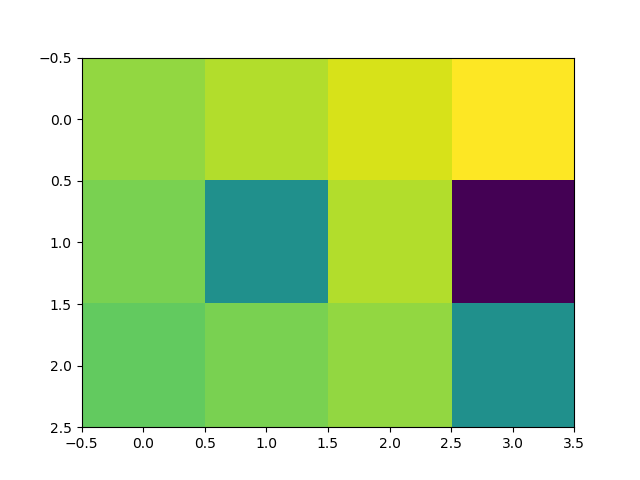

interactive(children=(FloatSlider(value=0.0, description='w', max=10.0, step=1.0), Output()), _dom_classes=('w…

In [7]:
# let's plot our figure. 
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.imshow(Vs[0])

def update(w=1):
    ax.imshow(Vs[int(w)])
    fig.canvas.draw_idle()

interact(update, w=widgets.FloatSlider(value=0,min=0,max=T,step=1));